In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [138]:
# Carregar o arquivo CSV
df = pd.read_csv('dengue_sinan.csv', low_memory=False)

In [139]:
display(df)

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,...,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,158,2,A90,2016-03-05,201609,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
1,298,2,A90,2016-02-15,201607,2016,29,293290,1385.0,3280969.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62...
2,5082,2,A90,2016-03-25,201612,2016,29,293250,1385.0,2800527.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d62...
3,111262,2,A90,2016-03-24,201612,2016,29,291360,1385.0,2706628.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
4,166,2,A90,2016-03-13,201611,2016,29,292210,1381.0,2498731.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,595d3ab2cc2bfc76ee1e9ef090ac6abf0e7b64aee90e92...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620206,7061,2,A90,2024-02-21,202408,2024,29,292300,1388.0,2506254.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,4ca7df06d628b3ec9fcf8f4a3a8b11661f5e98b8e54b34...
620207,1257,2,A90,2024-03-04,202410,2024,29,291980,1398.0,7175973.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,5152560db10a8bc76f1490909a74620605b6f3b512e8d7...
620208,372024,2,A90,2024-01-26,202404,2024,29,292303,1381.0,6540007.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,d7c7bebe87009f4f9e4a606f6fe2ddc83a67ea3c48ada8...
620209,128,2,A90,2024-02-19,202408,2024,29,291400,1381.0,2824558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...


In [140]:
#Cria a coluna 'COM_DENGUE'
#df['COM_DENGUE'] = df['CLASSI_FIN'] == (10.0 or 11.0 or 12.0)
#df['COM_DENGUE'].value_counts()

In [141]:
#Cria a variável com_dengue que será utilizada para classificação
com_dengue = df['CLASSI_FIN'].apply(lambda x:1 if x == (10.0 or 11.0 or 12.0) else 0)
print(com_dengue)

0         0
1         0
2         1
3         1
4         0
         ..
620206    0
620207    0
620208    0
620209    0
620210    0
Name: CLASSI_FIN, Length: 620211, dtype: int64


# 1. Pré-processamento de dados

## REMOÇÃO DE COLUNAS COM VALORES AUSENTES

In [142]:
# Filtragem de colunas nulas
vetor_colunas_nulas = df.isna().mean()

In [143]:
colunas_faltantes = vetor_colunas_nulas[vetor_colunas_nulas >= 0.70].index

In [144]:
dengue_filtrada = df.drop(columns=colunas_faltantes)

## GRÁFICOS (MATRIZ DE CORRELAÇÃO/COVARIÂNCIA, HISTOGRAMAS / BOXPLOTS)

In [145]:
# Matrix de correlação e gráfico de correlação
colunas_numericas = dengue_filtrada.select_dtypes(include=[np.number]).columns

In [146]:
sem_faltantes = dengue_filtrada[colunas_numericas].dropna()

In [147]:
matrix_correlacao = sem_faltantes.corr()

C:\Users\leand\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


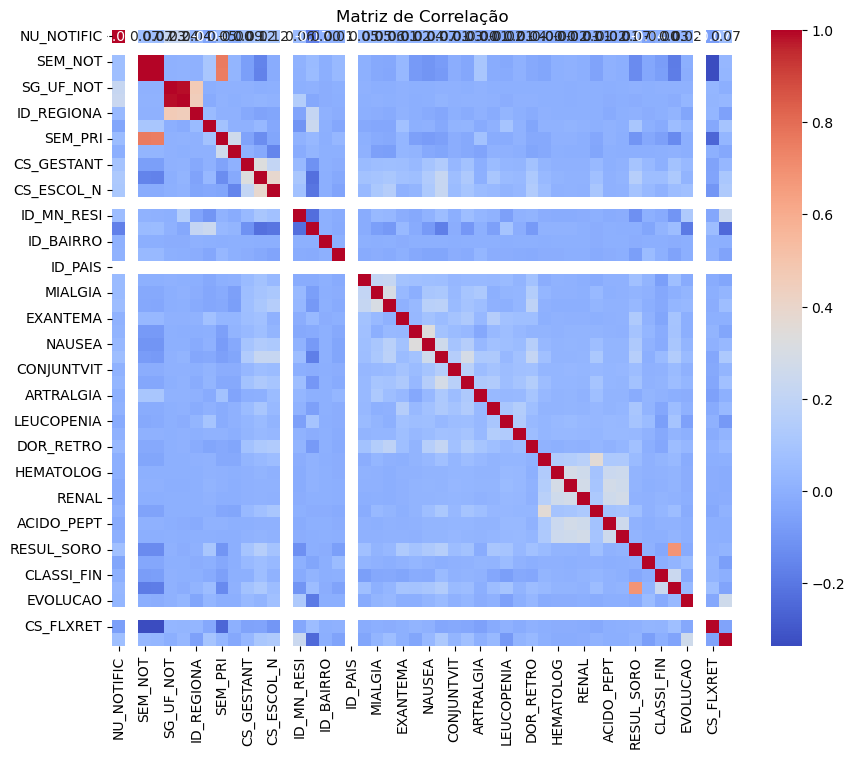

In [148]:
# Plot do gráfico de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## CODIFICAÇÃO/ENCODING

## NORMALIZAÇÃO/PADRONIZAÇÃO

In [149]:
# Normalizar variáveis
variaveis_normalizada = (sem_faltantes - sem_faltantes.mean()) / sem_faltantes.std()

In [150]:
dados_normalizados = variaveis_normalizada.copy()

In [151]:
print(variaveis_normalizada.head())

    NU_NOTIFIC  TP_NOT   SEM_NOT    NU_ANO  SG_UF_NOT  ID_MUNICIP  ID_REGIONA  \
2    -0.372121     NaN -2.010894 -1.981861   -0.02928    0.221652   -0.126696   
10   -0.376966     NaN -2.055520 -1.981861   -0.02928   -0.222523   -0.126696   
20    1.360298     NaN -2.055520 -1.981861   -0.02928    0.137440   -0.253177   
35    1.360307     NaN -2.051463 -1.981861   -0.02928    0.137440   -0.253177   
52    1.360246     NaN -2.055520 -1.981861   -0.02928    0.137440   -0.253177   

    ID_UNIDADE   SEM_PRI  NU_IDADE_N  ...  ACIDO_PEPT  AUTO_IMUNE  RESUL_SORO  \
2    -0.631767 -1.451816    0.236800  ...    0.072518     0.06661    0.852842   
10   -0.642537 -1.635085    0.200014  ...    0.072518     0.06661   -0.744963   
20   -1.658438 -1.632081    0.110095  ...    0.072518     0.06661   -0.744963   
35   -1.658438 -1.484865    0.056960  ...    0.072518     0.06661   -1.543865   
52   -1.658438 -1.632081    0.281760  ...    0.072518     0.06661   -0.744963   

    HOSPITALIZ  CLASSI_FIN

# 2. Treinamento de algoritmos

# 2.0.1 Ajustes na base

In [152]:
dengue = dados_normalizados
display(dengue)

,NU_NOTIFIC,TP_NOT,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,SEM_PRI,NU_IDADE_N,...,ACIDO_PEPT,AUTO_IMUNE,RESUL_SORO,HOSPITALIZ,CLASSI_FIN,CRITERIO,EVOLUCAO,TP_SISTEMA,CS_FLXRET,IDENT_MICR
2,-0.372121,NaN,-2.010894,-1.981861,-0.02928,0.221652,-0.126696,-0.631767,-1.451816,0.236800,...,0.072518,0.06661,0.852842,-0.169946,0.844286,0.953830,-0.253696,NaN,0.9966,-0.303790
10,-0.376966,NaN,-2.055520,-1.981861,-0.02928,-0.222523,-0.126696,-0.642537,-1.635085,0.200014,...,0.072518,0.06661,-0.744963,-0.169946,0.844286,-0.967585,-0.253696,NaN,0.9966,-0.303790
20,1.360298,NaN,-2.055520,-1.981861,-0.02928,0.137440,-0.253177,-1.658438,-1.632081,0.110095,...,0.072518,0.06661,-0.744963,-0.169946,-1.175758,-0.967585,3.989947,NaN,0.9966,3.298987
35,1.360307,NaN,-2.051463,-1.981861,-0.02928,0.137440,-0.253177,-1.658438,-1.484865,0.056960,...,0.072518,0.06661,-1.543865,-0.169946,0.844286,-0.967585,-0.253696,NaN,0.9966,3.298987
52,1.360246,NaN,-2.055520,-1.981861,-0.02928,0.137440,-0.253177,-1.658438,-1.632081,0.281760,...,0.072518,0.06661,-0.744963,-0.169946,-1.175758,-0.967585,-0.253696,NaN,0.9966,3.298987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615824,-0.364813,NaN,1.218416,1.255741,-0.02928,0.031763,-0.253177,0.444560,0.939694,0.257236,...,0.072518,0.06661,0.852842,-0.169946,-1.175758,0.953830,-0.253696,NaN,-1.0034,-0.303790
615848,-0.343983,NaN,1.218416,1.255741,-0.02928,0.221652,-0.126696,0.969933,0.939694,0.114182,...,0.072518,0.06661,0.852842,-0.824452,-1.175758,0.953830,-0.253696,NaN,-1.0034,-0.303790
615856,-0.381341,NaN,1.226530,1.255741,-0.02928,-0.148218,0.202153,-0.704455,0.942698,0.110095,...,0.072518,0.06661,0.852842,-0.169946,-1.175758,-0.967585,-0.253696,NaN,-1.0034,-0.303790
615865,2.969939,NaN,1.214359,1.255741,-0.02928,-0.100333,-0.227881,-0.774163,0.933685,0.085571,...,0.072518,0.06661,0.852842,-0.169946,-1.175758,0.953830,-0.253696,NaN,-1.0034,-0.303790


In [153]:
dengue.columns[dengue.isnull().all()]

Index(['TP_NOT', 'SG_UF', 'ID_PAIS', 'TP_SISTEMA'], dtype='object')

In [154]:
colunas_nulas = dengue.columns[dengue.isnull().all()]
dengue = dengue.drop(colunas_nulas,axis=1)

In [155]:
#Cria a coluna que será usada para classificação classificação 'COM_DENGUE'
dengue['COM_DENGUE'] = com_dengue

<Axes: >

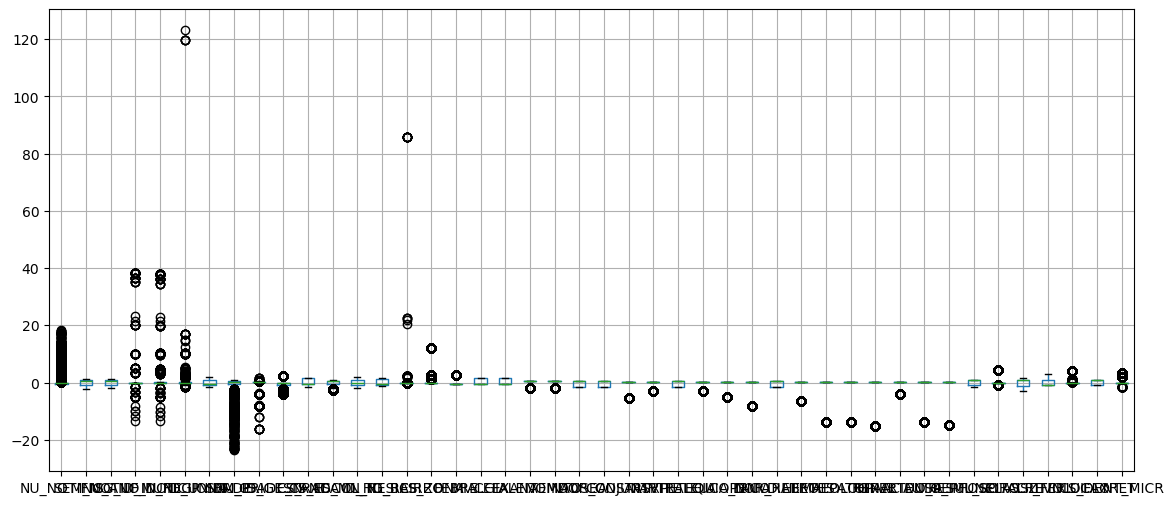

In [156]:
y = 'COM_DENGUE'
#x = ['FEBRE', 'DOR_RETRO', 'RESUL_SORO']
dengue.drop([y], axis=1).boxplot(figsize=(14,6))

In [157]:
# obter 200 instâncias de cada classe selecionadas aleatoriamete
#amostra_semDengue = dengue[dengue[y] > 0].sample(n=200, random_state=3)
#amostra_comDengue = dengue[dengue[y] < 0].sample(n=200, random_state=6)

In [158]:
# Concatenar as subamostras em um único dataframe
#amostra = pd.concat([amostra_semDengue, amostra_comDengue])

In [159]:
# Dividir o conjunto de treino e teste
#X_train, X_test, y_train, y_test = train_test_split(amostra[[x[0], x[1]]], amostra[y], test_size=0.2, random_state=9)

In [160]:
# Defini o x e o y da base
x_dengue = dengue.drop('COM_DENGUE',axis=1)
y_dengue = dengue.COM_DENGUE

In [161]:
# Dividir o conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(x_dengue, y_dengue, test_size=0.25, random_state=9)

# 2.1 K-Nearest Neighbors (KNN)

In [162]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [163]:
#Fit do modelo
neight = neigh.fit(X_treino, y_treino)

In [164]:
# Predicão KNN
pred_KNN = neigh.predict(X_teste)

In [165]:
# Acurácia
print(accuracy_score(y_teste,pred_KNN))

0.9418693736832024


In [166]:
# Precisão
print(precision_score(y_teste,pred_KNN))

0.9419376809126511


In [167]:
# Recall
print(recall_score(y_teste,pred_KNN))

0.9541221110727838


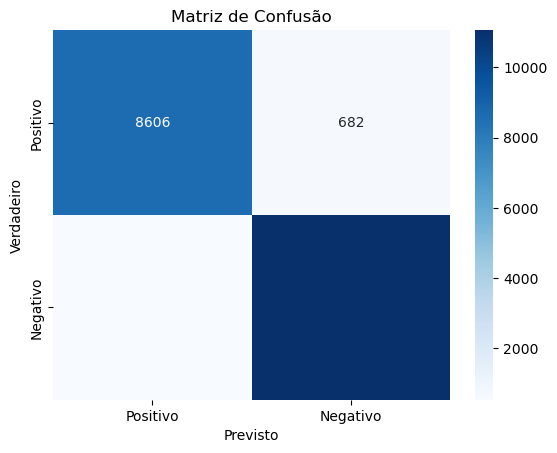

In [168]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_teste, pred_KNN)

# Define rótulos para os eixos
labels = ['Positivo', 'Negativo']

# Cria o mapa de cor da matriz
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# 2.2 Árvore de Decisão

In [169]:
clfArvore = tree.DecisionTreeClassifier(random_state=0, min_samples_split=2, min_samples_leaf=1)

In [170]:
#Fit do modelo
clfArvore = clfArvore.fit(X_treino, y_treino)

In [171]:
# Predicão
pred_Arvore = clfArvore.predict(X_teste)

In [172]:
# Acurácia
print(accuracy_score(y_teste,pred_Arvore))

1.0


In [173]:
# Precisão
print(precision_score(y_teste,pred_Arvore))

1.0


In [174]:
# Recall
print(recall_score(y_teste,pred_Arvore))

1.0


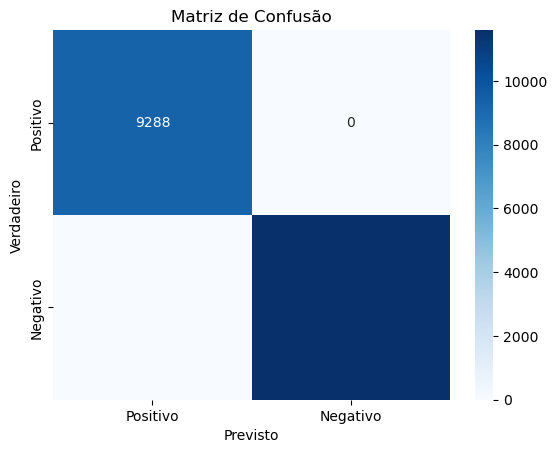

In [175]:
# Calcula a matriz de confusão
cma = confusion_matrix(y_teste, pred_Arvore)

# Define rótulos para os eixos
labels = ['Positivo', 'Negativo']

# Cria o mapa de cor da matriz
sns.heatmap(cma, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# 2.4 Logistic Regression (Regressão Logística)

In [176]:
clfLog = LogisticRegression(penalty='l2', random_state=0, max_iter=100, solver='lbfgs')

In [177]:
# Fit do modelo
clfLog = clfLog.fit(X_treino, y_treino)

In [178]:
# Predicão
pred_Log = clfLog.predict(X_teste)

In [179]:
# Acurácia
print(accuracy_score(y_teste,pred_Log))

0.9804156291898104


In [180]:
# Precisão
print(precision_score(y_teste,pred_Log))

0.9677230537670374


In [181]:
# Recall
print(recall_score(y_teste,pred_Log)) 

0.9980165574335977


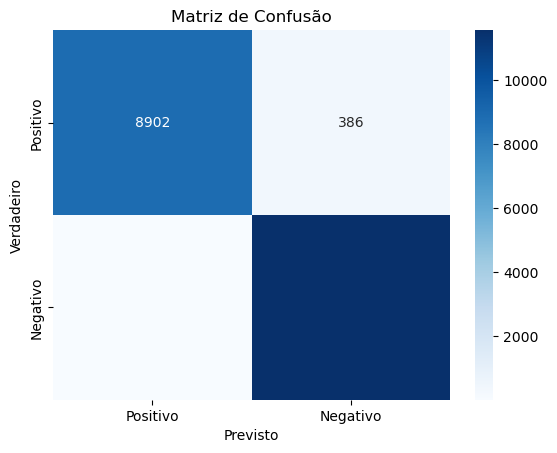

In [182]:
# Calcula a matriz de confusão
cmrl = confusion_matrix(y_teste, pred_Log)

# Define rótulos para os eixos
labels = ['Positivo', 'Negativo']

# Cria o mapa de cor da matriz
sns.heatmap(cmrl, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Adiciona eixos e title
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

# 3. Avaliação